In [46]:
import csv
def getPoints(file_name):
    with open (file_name, 'r') as file_obj:
        points = []
        reader = csv.DictReader(file_obj, delimiter=',')
        for row in reader:
            coordinates = []
            for col in reader.fieldnames:
                coordinates.append(float(row[col]))
            points.append(coordinates)
    return points

In [47]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] =[5, 5]
colorsValue = ['grey', 'red', 'blue', 'green', 'yellow', 'violet']
def draw(points, colorInd):
    for point in points:
        plt.scatter(point[0], point[1], 20, colorsValue[colorInd])

In [48]:
def getMins(points):
    minX = points[0][0];
    minY = points[0][1]
    for point in points:
        if (point[0] < minX):
            minX = point[0]
        if (point[1] < minY):
            minY = point[1]
    return minX, minY

In [49]:
def getMaxs(points):
    maxX = points[0][0];
    maxY = points[0][1]
    for point in points:
        if (point[0] > maxX):
            maxX = point[0]
        if (point[1] > maxY):
            maxY = point[1]
    return maxX, maxY

In [50]:
def distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 ) ** 0.5

In [51]:
def getNeighbours(points, point, e):
    neighbors = []
    for curpoint in points:
        if (distance(curpoint, point) < e):
            neighbors.append(curpoint)
    return neighbors

In [52]:
import numpy as np
def getCoreSamples(points, e, m):
    indx = np.random.randint(len(points))
    curpoint = points[indx]
    del points[indx]
    neighbours = getNeighbours(points, curpoint, e)
    if (len(neighbours) < m):
        return []
    coreSamples = [curpoint]
    while(len(neighbours) > 0):
        curpoint = neighbours[0]
        coreSamples.append(curpoint)
        del neighbours[0]
        newneighbours = getNeighbours(points, curpoint, e)
        if (len(newneighbours) > m):
            neighbours += newneighbours
            for newneighbour in newneighbours:
                points.remove(newneighbour)
    return coreSamples
    
    

In [58]:
def DBSCAN(filename, e, m, expected_cluster):
    c = 0
    while(c != expected_cluster):
        points = getPoints(filename)
        c = 0;
        draw(points, 0)
        while(len(points) > 0):
            coreSamples = getCoreSamples(points, e, m)
            if (len(coreSamples) > 0):
                c+=1
                draw(coreSamples, c)

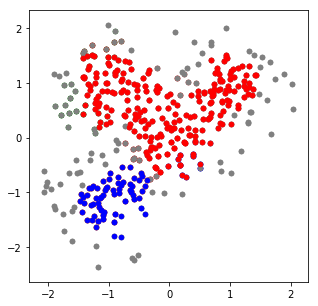

In [60]:
DBSCAN('datasets/blobs.csv', 0.4, 10, 2)

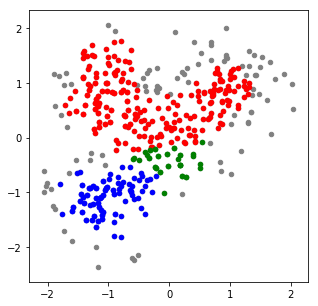

In [ ]:
DBSCAN('datasets/blobs.csv', 0.5, 19, 3)

In [ ]:
DBSCAN('datasets/blobs.csv', 0.5, 24, 4)

In [ ]:
DBSCAN('datasets/blobs.csv', 0.45345, 24, 5)